In [1]:
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

In [3]:
data=pd.read_csv("20230623.csv")

interaction_array=np.array(data['interactions'])
interaction_with_array=np.array(data['target_obj'])

In [25]:
interaction_array

array(['reading', 'reading', 'reading', 'reading', 'reading', 'reading',
       'reading', 'reading', 'reading', 'reading', 'reading',
       'holding,holding', 'holding,holding', 'holding,holding',
       'holding,holding', 'holding', 'holding', 'holding,holding',
       'holding,holding', 'holding,holding', 'holding,holding',
       'holding,holding', 'holding,drinking', 'holding,drinking',
       'holding,drinking', 'holding,holding', 'holding,holding',
       'holding,holding', 'holding,holding', 'holding,drinking',
       'holding,drinking', 'holding,drinking', 'holding,drinking',
       'holding', 'holding,drinking', 'holding,drinking',
       'holding,drinking', 'holding,drinking', 'holding,drinking',
       'holding,drinking', 'holding,drinking', 'holding,drinking',
       'holding,drinking', 'holding', 'holding', 'holding,holding',
       'holding,holding', 'holding,drinking', 'holding', 'holding',
       'holding,holding', 'holding,holding', 'holding,holding', 'holding',
    

In [4]:
data

,time,x,z,action,interactions,target_obj
0,1.687519e+09,0.763306,3.4890,standing,reading,book
1,1.687519e+09,0.694172,3.5135,standing,reading,book
2,1.687519e+09,0.606528,3.4370,standing,reading,book
3,1.687519e+09,0.493744,3.3800,standing,reading,book
4,1.687519e+09,0.428097,3.3010,standing,reading,book
...,...,...,...,...,...,...
215,1.687519e+09,-0.614946,3.5510,walking,reading,book
216,1.687519e+09,-0.115145,3.7570,walking,reading,book
217,1.687519e+09,0.280715,4.0100,walking,reading,book
218,1.687519e+09,0.601495,4.0390,walking,reading,book


In [7]:
data2=data.loc[:,['x','z']]

In [8]:
data2

,x,z
0,0.763306,3.4890
1,0.694172,3.5135
2,0.606528,3.4370
3,0.493744,3.3800
4,0.428097,3.3010
...,...,...
215,-0.614946,3.5510
216,-0.115145,3.7570
217,0.280715,4.0100
218,0.601495,4.0390


In [9]:
data3 = [list(e) for e in zip(data['x'],data['z'])]

In [10]:
data3

[[0.7633057236671448, 3.489000082015991],
 [0.6941724121570587, 3.5135000944137573],
 [0.6065276463826498, 3.437000115712484],
 [0.4937440554300944, 3.380000114440918],
 [0.4280965328216553, 3.3010001182556152],
 [0.4451888799667358, 3.3885000944137573],
 [0.4554630368947983, 3.4470001459121704],
 [0.3684335649013519, 3.3215001821517944],
 [0.2132256925106048, 3.267000198364258],
 [0.2132256925106048, 3.267000198364258],
 [0.1350875198841095, 3.326000213623047],
 [-0.0445983111858367, 3.086000204086304],
 [-0.041982801631093, 3.298500180244446],
 [-0.0411903951317071, 3.431500196456909],
 [-0.053601149469614, 3.338000178337097],
 [-0.0441021863371133, 3.168000102043152],
 [-0.0091075827367603, 3.168500065803528],
 [0.044914027210325, 3.276000142097473],
 [0.1844989856084188, 3.3330001831054688],
 [0.2533002595106761, 3.3626668453216557],
 [0.2919767002264659, 3.377333482106527],
 [0.2924359937508901, 3.298333485921224],
 [0.2793813347816467, 3.2256667613983154],
 [0.2596066941817601, 3

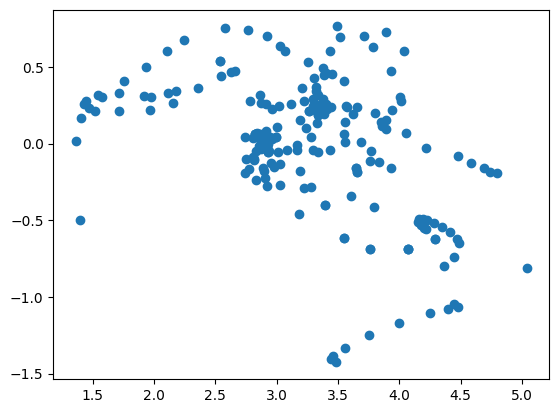

In [13]:
data=pd.read_csv("20230623.csv")
plt.scatter(data.loc[:, ['z']], data.loc[:, ['x']])

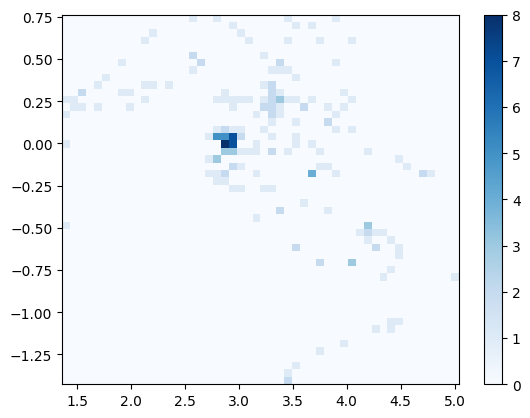

In [15]:
data=pd.read_csv("20230623.csv")
plt.hist2d(data['z'], data['x'], bins=50, cmap='Blues')
plt.colorbar()
plt.show()

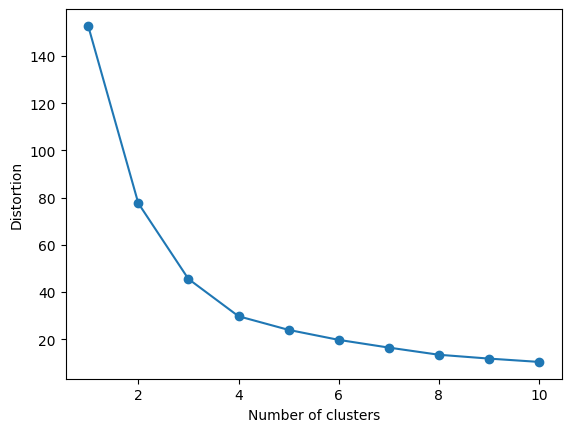

In [16]:
#elbow
distortions = []

for i in range(1,11):                 
    km = KMeans(n_clusters=i,
                init='k-means++',     
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(data3)                        
    distortions.append(km.inertia_)   

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
N=4

In [35]:
km = KMeans(n_clusters=N, random_state=42)
label = km.fit_predict(data2[:])

In [36]:
label

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3],
      dtype=int32)

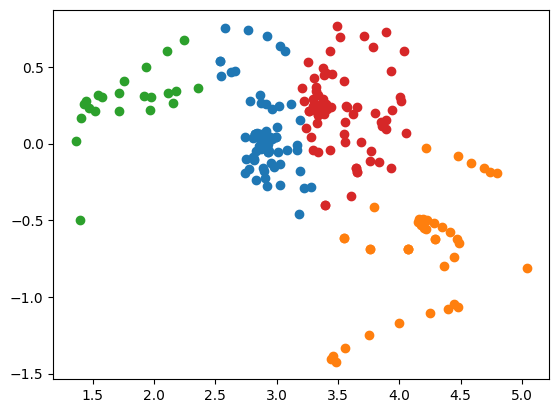

In [38]:
for i in range(N):
    plt.scatter(data.loc[:, ['z']][label==i], data.loc[:, ['x']][label==i])
# plt.scatter(data.loc[:, ['z']][label==0], data.loc[:, ['x']][label==0])
# plt.scatter(data.loc[:, ['z']][label==1], data.loc[:, ['x']][label==1])
# plt.scatter(data.loc[:, ['z']][label==2], data.loc[:, ['x']][label==2])
# plt.scatter(data.loc[:, ['z']][label==3], data.loc[:, ['x']][label==3])
plt.show()

In [21]:
from gensim.models import KeyedVectors
model_dir = 'wiki-news-300d-1M.vec'
model = KeyedVectors.load_word2vec_format(model_dir, binary=False)

[0.4215455, 0.32687974, 0.3608469, 0.38231784, 0.28279155]
[0.46003753, 0.33964172, 0.37388474, 0.44269207, 0.29376245]
[0.4215455, 0.32687974, 0.3608469, 0.38231784, 0.28279155]
[0.4215455, 0.32687974, 0.3608469, 0.38231784, 0.28279155]


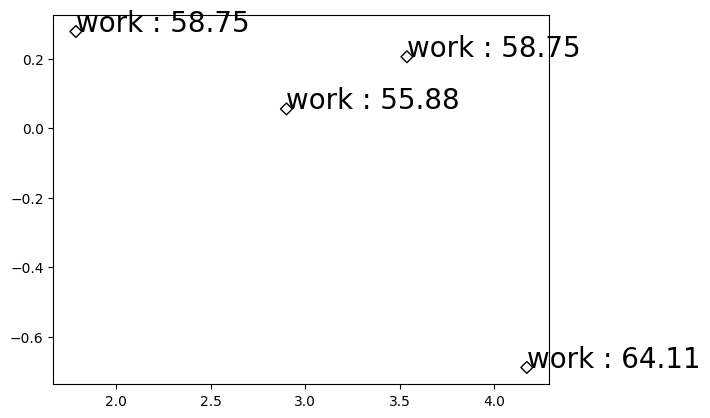

In [44]:
dd1=data.loc[:, ['z']][label==0]
ddList1 = dd1["z"].index.to_list()
dd2=data.loc[:, ['z']][label==1]
ddList2 = dd2["z"].index.to_list()
dd3=data.loc[:, ['z']][label==2]
ddList3 = dd3["z"].index.to_list()
dd4=data.loc[:, ['z']][label==3]
ddList4 = dd4["z"].index.to_list()

observedList1 =[]
for i in ddList1:
    observedList1.append(interaction_array[i])
    observedList1.append(interaction_with_array[i])

observedList2 =[]
for i in ddList2:
    observedList2.append(interaction_array[i])
    observedList2.append(interaction_with_array[i]) 

observedList3 =[]
for i in ddList3:
    observedList3.append(interaction_array[i])
    observedList3.append(interaction_with_array[i])

split_values = []
original_values = []
for item in observedList1:
    split_items = item.split(',')
    split_values.extend(split_items)
    original_values.extend([item] * len(split_items))

split_values2 = []
original_values2 = []
for item in observedList2:
    split_items = item.split(',')
    split_values2.extend(split_items)
    original_values2.extend([item] * len(split_items))

split_values3 = []
original_values3 = []
for item in observedList1:
    split_items = item.split(',')
    split_values3.extend(split_items)
    original_values3.extend([item] * len(split_items))

split_values4 = []
original_values4 = []
for item in observedList1:
    split_items = item.split(',')
    split_values4.extend(split_items)
    original_values4.extend([item] * len(split_items))

centers = km.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], marker="D", facecolors='none', edgecolors='black')
observed_lists = [split_values, split_values2, split_values3, split_values4]
utilization_class_list = ['work','relax','dining','read','aisle']
utilization = 'none'

for i, observed_list in enumerate(observed_lists):
    score = [np.mean([model.similarity(utilization, observe) for observe in observed_list]) 
             for utilization in utilization_class_list]
    max_socre = np.max(score)

    similar_list = model.most_similar(f"{utilization}")
    most_similar_score =similar_list[0][1]
    prob = max_socre / most_similar_score *100

    max_index = np.argmax(score)
    print(score)
    utilization = utilization_class_list[max_index]
    if prob>50:
        plt.text(centers[i][1], centers[i][0], f"{utilization} : {round(prob, 2)}", fontsize=20)
    else:
        plt.text(centers[i][1], centers[i][0], f"unknown", fontsize=20)


In [ ]:
similar_list = model.most_similar('work')
for similar_set in similar_list:
    print(str(similar_set[0])+ " : " + str(similar_set[1]))

works : 0.717581570148468
working : 0.6682043671607971
job : 0.6681519746780396
Work : 0.642331063747406
work. : 0.6332440972328186
research : 0.6295222640037537
work- : 0.6242907047271729
doing : 0.6225779056549072
effort : 0.6146255731582642
work-- : 0.6137425303459167
